In [8]:
!pip install numpy pandas scikit-learn matplotlib yfinance


  AAPl


[*********************100%%**********************]  1 of 1 completed


/tmp/ipykernel_62/1479058300.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Short_SMA'] > data['Long_SMA']] = 1  # 1 indicates Buy
/tmp/ipykernel_62/1479058300.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Short_SMA'] < data['Long_SMA']] = -1  # -1 indicates Sell


Accuracy: 0.8235294117647058
Predicted future movement for AAPl: -1.0


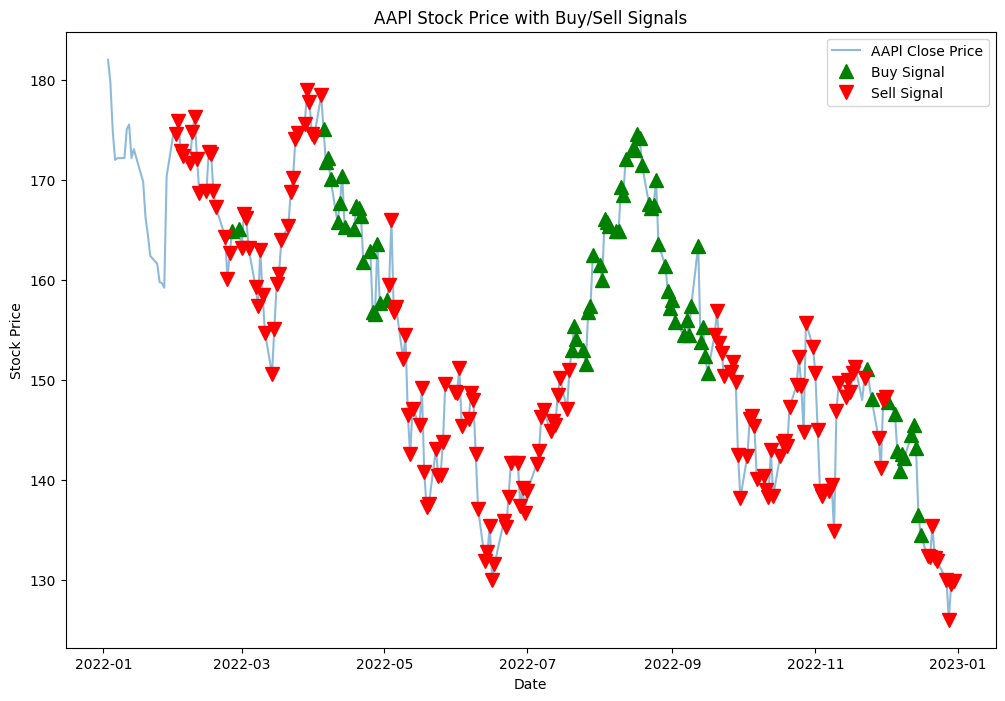

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch historical stock data using yfinance
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Feature Engineering: Simple Moving Averages (SMA)
def add_sma(data, short_window, long_window):
    data['Short_SMA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_SMA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

# Generate buy/sell signals based on SMA crossover strategy
def generate_signals(data):
    data['Signal'] = 0  # 0 indicates Hold
    data['Signal'][data['Short_SMA'] > data['Long_SMA']] = 1  # 1 indicates Buy
    data['Signal'][data['Short_SMA'] < data['Long_SMA']] = -1  # -1 indicates Sell

# Prepare Features and Target
def prepare_data(data):
    features = ['Short_SMA', 'Long_SMA']
    X = data[features].dropna()
    y = np.sign(X['Short_SMA'] - X['Long_SMA'])
    return X, y

# Train a Random Forest Classifier model with hyperparameter tuning
def train_model(X_train, y_train):
    model = RandomForestClassifier(random_state=42)

    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    return best_model

# Predict future movements
def predict_future_movements(model, X_future):
    predictions = model.predict(X_future)
    return predictions

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f'Accuracy: {accuracy}')

# Plot Buy/Sell signals
def plot_signals(data, ticker):
    plt.figure(figsize=(12, 8))
    plt.plot(data['Close'], label=f'{ticker} Close Price', alpha=0.5)
    plt.plot(data[data['Signal'] == 1].index, data['Close'][data['Signal'] == 1], '^', markersize=10, color='g', label='Buy Signal')
    plt.plot(data[data['Signal'] == -1].index, data['Close'][data['Signal'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
    plt.title(f'{ticker} Stock Price with Buy/Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Main function
def main():
    # Fetch historical stock data for Apple (AAPL)
    ticker_aapl = input(" ")
    start_date_aapl = '2022-01-01'
    end_date_aapl = '2022-12-31'
    stock_data_aapl = fetch_stock_data(ticker_aapl, start_date_aapl, end_date_aapl)

    # Feature engineering for Apple
    add_sma(stock_data_aapl, short_window=20, long_window=50)
    generate_signals(stock_data_aapl)

    # Prepare data for Apple
    X_aapl, y_aapl = prepare_data(stock_data_aapl)

    # Split data into training and testing sets for Apple
    X_train_aapl, X_test_aapl, y_train_aapl, y_test_aapl = train_test_split(X_aapl, y_aapl, test_size=0.2, random_state=42)

    # Train the model with hyperparameter tuning for Apple
    model_aapl = train_model(X_train_aapl, y_train_aapl)

    # Evaluate the model for Apple
    evaluate_model(model_aapl, X_test_aapl, y_test_aapl)

    # Predict future movements for Apple
    X_future_aapl = X_aapl.tail(1)  # Using the most recent data as a placeholder for future prediction
    future_predictions_aapl = predict_future_movements(model_aapl, X_future_aapl)
    print(f'Predicted future movement for {ticker_aapl}: {future_predictions_aapl[0]}')

    # Plot buy/sell signals for Apple
    plot_signals(stock_data_aapl, ticker_aapl)


if __name__ == "__main__":
    main()

# -1 is mean stock not buying/sell
# 1 is mean stock is buying / buy